In [ ]:
---
title: "Meta Kaggle Dataset Analysis-1"
format: 
  html:
    code-fold: true
jupyter: python3
---

# Meta Kaggle Dataset Analysis - I
Kaggle's public data on competitions, users, submission scores, and kernels

- https://www.kaggle.com/datasets/kaggle/meta-kaggle


In [1]:
%%html
<style type='text/css'>
.CodeMirror {
    font-size: 14px;
    font-family: 'Jetbrains Mono';
}
</style>

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType
from pyspark.sql.functions import *

In [6]:
spark = (SparkSession
        .builder
        .appName("meta-kaggle-data-analysis")
        .config("spark.executor.memory", "6g")
        .getOrCreate()
        )

23/08/15 07:55:37 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [7]:
# Show warnings with severity ERROR or More
spark.sparkContext.setLogLevel("ERROR")

In [8]:
spark

In [9]:
data_files_path = "/Volumes/samsung-2tb/rk/downloads/archive"

****

## 1. Tags

In [10]:
tags_file = f"{data_files_path}/Tags.csv"

In [11]:
tags_schema = StructType([
    StructField("Id", IntegerType()),
    StructField("ParentTagId", IntegerType()),
    StructField("Name", StringType()),
    StructField("Slug", StringType()),
    StructField("FullPath", StringType()),
    StructField("Description", StringType()),
    StructField("DatasetCount", IntegerType()),
    StructField("CompetitionCount", IntegerType()),
    StructField("KernelCount", IntegerType()),
])

In [12]:
tags = spark.read.csv(tags_file, header=True, schema=tags_schema)
tags.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- ParentTagId: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Slug: string (nullable = true)
 |-- FullPath: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- DatasetCount: integer (nullable = true)
 |-- CompetitionCount: integer (nullable = true)
 |-- KernelCount: integer (nullable = true)



In [13]:
tags.limit(5).toPandas()

,Id,ParentTagId,Name,Slug,FullPath,Description,DatasetCount,CompetitionCount,KernelCount
0,1115,12116,websites,web-sites,subject > science and technology > internet > websites,"Websites, like this one, are collections of content that can be found under a specific address. These datasets include information on individual websites or collections of websites.",318,0,231
1,1219,12000,research,research,subject > science and technology > research,"Research is our endeavor to systematically increase our knowledge about the world. Whether it's undertaken by greats like Einstein or underpaid graduate students, you'll find the fruits of their labor in this tag plus the kernels that make their work reproducible.",583,10,299
2,1220,12116,search engines,search-engines,subject > science and technology > internet > search engines,None,86,0,78
3,1222,11105,universities and colleges,universities-and-colleges,subject > people and society > education > universities and colleges,This tag contains all kinds of information about which colleges are good and how much money people make after attending classes there.,5311,0,419
4,2100,16637,culture and humanities,culture-and-humanities,subject > culture and humanities,What is it to be human? What activities and patterns of behavior define us and our societies? This tag will help you tackle these questions.,297,0,76


In [14]:
tags.createOrReplaceTempView("tags")

In [15]:
spark.sql("""
SELECT
    COUNT(*) AS total_records
  , COUNT(DISTINCT Id)
  , COUNT(DISTINCT ParentTagId)
FROM
    tags
""").toPandas()

,total_records,count(DISTINCT Id),count(DISTINCT ParentTagId)
0,788,788,61


### Sample

In [16]:
spark.sql("SELECT * FROM tags WHERE ParentTagId IS NOT NULL ORDER BY ParentTagId LIMIT 5").toPandas()

,Id,ParentTagId,Name,Slug,FullPath,Description,DatasetCount,CompetitionCount,KernelCount
0,2107,2100,languages,languages,subject > culture and humanities > languages,Language is a method of communication that consists of using words arranged into meaningful patterns. This is a good place to find natural language processing datasets and kernels to study languages and train your chat bots.,648,4,284
1,2112,2100,popular culture,popular-culture,subject > culture and humanities > popular culture,"Popular culture datasets and kernels are associated with topics like TV shows, movies, music, and video games. The greatest screenwriters come here to train their AI to write movie scripts.",323,0,72
2,2500,2100,games,games-and-toys,subject > culture and humanities > games,One of the hallmarks of intelligence is the use of games and toys to occupy free time and develop intellectually. Often stored in Mom's basement.,5023,1,34676
3,2302,2200,dance,dance,subject > arts and entertainment > dance,None,155,0,8
4,2206,2200,literature,literature,subject > arts and entertainment > literature,"This tag is your digital library for varius copora such as Southern Literature, Paranormal Romance novels, and Urban Dictionary spelling variations.",2616,7,458


### Records where `ParentTagId` is null

In [17]:
spark.sql("SELECT * FROM tags WHERE ParentTagId IS NULL").toPandas()

,Id,ParentTagId,Name,Slug,FullPath,Description,DatasetCount,CompetitionCount,KernelCount
0,3000,NaN,geography and places,geography-and-places,geography and places,None,62,0,0
1,13100,NaN,audience,audience,audience,None,2,0,0
2,13200,NaN,technique,analysis,technique,None,0,0,0
3,14100,NaN,data type,data-type,data type,None,21,0,0
4,16000,NaN,admin,kaggle,admin,Admin created tags for a specific internal purpose,4,0,5
5,16585,NaN,packages,packages,packages,"Libraries and frameworks that help you perform common functions, such as data cleaning, model building, and data visualizations",3,0,0
6,16637,NaN,subject,topic,subject,None,2,0,14
7,16673,NaN,task,task,task,None,0,0,0
8,16674,NaN,language,language,language,None,4,0,0
9,16679,NaN,architecture,architecture,architecture,None,0,0,0


In [18]:
spark.sql("""
SELECT
    ParentTagId
  , COLLECT_SET(Name)             AS Name
  , COLLECT_SET(Slug)             AS Slug
  , COLLECT_SET(DatasetCount)     AS DatasetCount
  , COLLECT_SET(CompetitionCount) AS CompetitionCount
  , COLLECT_SET(KernelCount)      AS KernelCount
FROM
    tags
GROUP BY
    ParentTagId
ORDER BY
    ParentTagId
LIMIT 5
""").toPandas()

,ParentTagId,Name,Slug,DatasetCount,CompetitionCount,KernelCount
0,NaN,"[packages, admin, audience, language, task, data type, subject, architecture, technique, geography and places]","[packages, analysis, audience, kaggle, language, task, topic, data-type, architecture, geography-and-places]","[0, 2, 3, 4, 21, 62]",[0],"[0, 5, 14]"
1,2100.0,"[languages, games, popular culture]","[languages, games-and-toys, popular-culture]","[323, 648, 5023]","[0, 1, 4]","[34676, 72, 284]"
2,2200.0,"[museums, celebrities, dance, movies and tv shows, comics and animation, art, philosophy, literature, music]","[visual-arts, comics-and-animation, museums, celebrity, dance, film, philosophy, literature, music]","[113, 9923, 84, 2616, 889, 155, 8221, 1886, 447]","[0, 1, 3, 7]","[10816, 2054, 8, 40, 200, 25, 10, 458, 16746]"
3,2500.0,"[gambling, puzzles, card games, board games, video games]","[gambling, puzzles, card-games, video-games, board-games]","[617, 4969, 157, 479]","[0, 1, 13, 222]","[33, 129, 2, 3907, 154]"
4,2507.0,[simulations],[simulation-games],[282],[13],[194]


****

## 2. Competition tags

In [19]:
competition_tags_file = f"{data_files_path}/CompetitionTags.csv"

In [ ]:
competition_tags_schema = StructType([
    StructField("Id", IntegerType(), False),
    StructField("CompetitionId", IntegerType(), False),
    StructField("TagId", IntegerType(), False),
])

In [21]:
competition_tags = spark.read.csv(competition_tags_file, header=True, schema=competition_tags_schema)
competition_tags.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- CompetitionId: integer (nullable = true)
 |-- TagId: integer (nullable = true)



In [22]:
competition_tags.count()

863

In [23]:
competition_tags.select([
    min("Id").alias("min_id")
  , max("Id").alias("max_id")
]).show()

+------+------+
|min_id|max_id|
+------+------+
|     3| 22077|
+------+------+



In [24]:
competition_tags.createOrReplaceTempView("competition_tags")
spark.sql("SELECT * FROM competition_tags ORDER BY Id LIMIT 5").toPandas()

,Id,CompetitionId,TagId
0,3,6649,8317
1,4,6649,11122
2,5,6927,12402
3,6,7042,11208
4,7,7042,2107


### Is `competition_tags` has a relation with `tags`?

In [25]:
spark.sql("""
SELECT
    MIN(TagId)
  , MAX(TagId)
FROM
    competition_tags
""").toPandas()

,min(TagId),max(TagId)
0,1219,17142


### Are there any extra tags in `competition_tags` that don't exist in `Tags`?

In [26]:
spark.sql("""
SELECT TagId FROM competition_tags
MINUS
SELECT Id FROM tags
""").toPandas()

,TagId


- <font color='green'> This proves that `CompetitionTags` is a child of `Tags`.

****

## 3. Users

In [10]:
users_file = f"{data_files_path}/Users.csv"

In [11]:
users_schema = StructType([
    StructField("Id", IntegerType(), False),
    StructField("UserName", StringType(), False),
    StructField("DisplayName", StringType(), False),
    StructField("RegisterDate", StringType(), False),
    StructField("PerformanceTier", IntegerType(), False),
])

In [12]:
users = spark.read.csv(users_file, header=True, schema=users_schema)

users.createOrReplaceTempView("users")
# spark.sql("CACHE TABLE users")

users.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- UserName: string (nullable = true)
 |-- DisplayName: string (nullable = true)
 |-- RegisterDate: string (nullable = true)
 |-- PerformanceTier: integer (nullable = true)



In [13]:
spark.sql("SELECT * FROM users LIMIT 5").toPandas()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,1,kaggleteam,Kaggle Team,03/24/2011,5
1,368,antgoldbloom,Anthony Goldbloom,01/20/2010,2
2,381,iguyon,Isabelle,01/29/2010,2
3,383,davidstephan,David Stephan,02/01/2010,0
4,384,gabewarren,Gabe Warren,02/02/2010,0


### Any UserName is repeated?

In [14]:
spark.sql("""
SELECT
    TRIM(LOWER(UserName))
  , COUNT(*)
FROM
    users
GROUP BY
    TRIM(LOWER(UserName))
HAVING
    COUNT(*) > 1
""").toPandas()

,trim(lower(UserName)),count(1)
0,fernaldiwidharsono,2


- A Single `UserName` is repeated twice.

In [15]:
spark.sql("SELECT * FROM users WHERE LOWER(UserName) = 'fernaldiwidharsono'").toPandas()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,7151080,fernaldiwidharsono,Fernaldi Widharsono,04/10/2021,0
1,16299515,fernaldiwidharsono,Fernaldi Widharsono,08/11/2023,0


### How many users are present?

In [16]:
spark.sql("""
SELECT
    COUNT(*)
  , COUNT(DISTINCT UserName)
  , COUNT(DISTINCT DisplayName)
  , MIN(Id)
  , MAX(Id)
  , MIN(RegisterDate)
  , MAX(RegisterDate)
FROM
    users
""").toPandas()

,count(1),count(DISTINCT UserName),count(DISTINCT DisplayName),min(Id),max(Id),min(RegisterDate),max(RegisterDate)
0,14511937,14511935,12525533,1,16299525,"//""",pch=21


### Some `RegisterDate` entries are not valid. how many are there?

In [17]:
spark.sql("""
SELECT
    *
FROM
    users
WHERE
    RegisterDate IS NOT NULL
AND RegisterDate != ""
AND RegisterDate != "0"
AND (
    regexp_extract(RegisterDate, r"(\d{2}/\d{2}/\d{4})", 1) == ""
OR  regexp_extract(RegisterDate, r"(\d{2}/\d{2}/\d{4})", 1) IS NULL)
""").toPandas()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,742268,apryor6,"""Alan """"AJ"""" Pryor","Ph.D.""",NaN
1,1317983,isstast,"""""""-prompt()","//""",NaN
2,1407283,testsisk,""""""" + alert('whos house? sisks house')","//""",NaN
3,1413486,ronaldchalmers12,"""rm(list = ls()) library(data.table) library(Matrix) library(xgboost) library(caret) library(dplyr) cat(""""Read data"""") df_train <- fread('../input/train.csv'","sep=""""",NaN
4,1749901,xssleet,""""""" aaaaa""""+ prompt(document.cookie)","//""",NaN
5,2102370,lindsaychen,"""predict(linefit1,data.frame(calories= 4.5), interval=""""confidence""""","level = .90)""",NaN
6,2696159,compscibas,"""_, _, a2 = forward_propagation(2, theta1, theta2) print(""""predict""""","a2)""",NaN
7,2792665,redhorn70,"""plot(Height~BHDiameter,bg=""""Blue""""",pch=21,NaN
8,3058651,dataminer2121,"""""""Hello","Piece of dust suspended in space""""""",NaN
9,4055025,romeormjrfabro,"""ROMEO """"RM""""","JR. FABRO""",NaN


In [18]:
spark.sql("""
SELECT
    MIN(to_date(RegisterDate, "MM/dd/yyyy")) MinRegisterDate
  , MAX(to_date(RegisterDate, "MM/dd/yyyy")) MaxRegisterDate
FROM
    users
WHERE
    RegisterDate IS NOT NULL
AND RegisterDate != ""
AND RegisterDate != "0"
AND regexp_extract(RegisterDate, r"(\d{2}/\d{2}/\d{4})", 1) != ""
AND regexp_extract(RegisterDate, r"(\d{2}/\d{2}/\d{4})", 1) IS NOT NULL
""").toPandas()

,MinRegisterDate,MaxRegisterDate
0,2010-01-20,2023-08-11


### First Character of the Username & Counts

In [19]:
username_summary = spark.sql("""
WITH temp AS (
SELECT
    UPPER(SUBSTR(UserName, 0, 1)) AS first_char
FROM
    users
)
SELECT
    first_char 
  , COUNT(*)   AS count
FROM
    temp
GROUP BY
    first_char
ORDER BY
    1
""")

df = username_summary.toPandas()
df

,first_char,count
0,None,1
1,4,10
2,A,1676649
3,B,515371
4,C,629320
5,D,733871
6,E,387289
7,F,326938
8,G,422692
9,H,511957


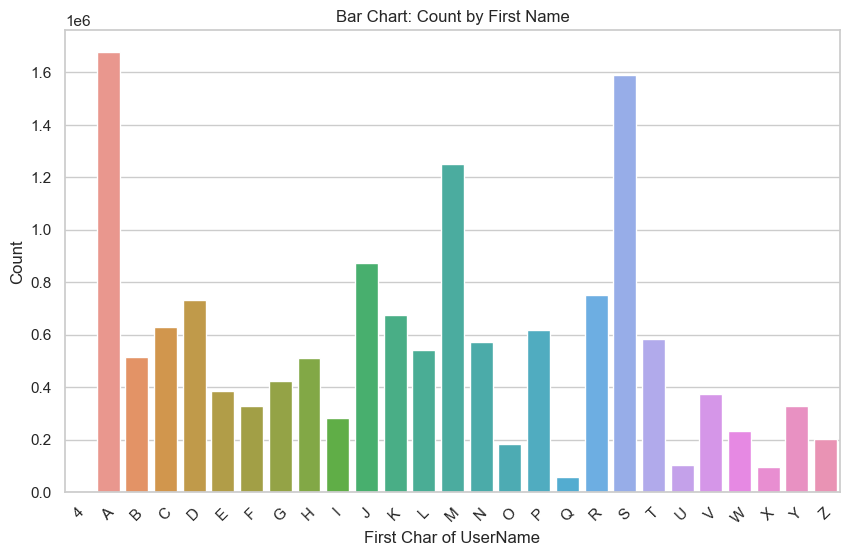

In [20]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='first_char', y='count', data=df)
plt.title('Bar Chart: Count by First Name')
plt.xlabel('First Char of UserName')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Users registered per Year

In [21]:
df = spark.sql("""
WITH temp AS (
SELECT
    TO_DATE(RegisterDate, "MM/dd/yyyy") RegisterDate
FROM
    users
WHERE
    RegisterDate IS NOT NULL
AND RegisterDate != ""
AND RegisterDate != "0"
AND regexp_extract(RegisterDate, r"(\d{2}/\d{2}/\d{4})", 1) != ""
AND regexp_extract(RegisterDate, r"(\d{2}/\d{2}/\d{4})", 1) IS NOT NULL
)
SELECT
    YEAR(RegisterDate) AS RegisterDate
  , COUNT(*)           AS count
FROM
    temp
GROUP BY
    YEAR(RegisterDate)
""").toPandas()

df

,RegisterDate,count
0,2018,1067009
1,2015,193328
2,2013,65644
3,2014,101093
4,2012,45920
5,2016,324914
6,2010,4512
7,2011,20813
8,2017,617936
9,2019,1465341


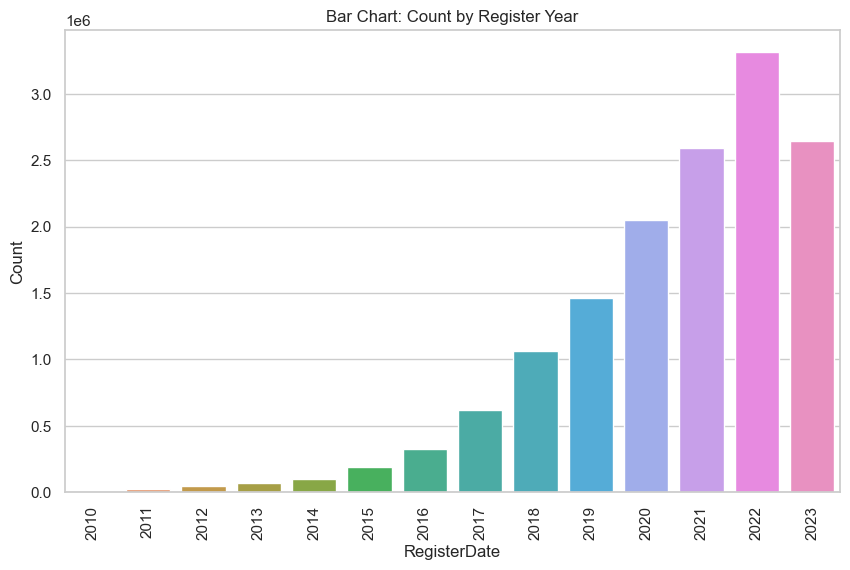

In [22]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))

sns.barplot(x='RegisterDate', y='count', data=df)
plt.title('Bar Chart: Count by Register Year')

plt.xlabel('RegisterDate')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

****

## 4. User Achievements

In [24]:
user_achievements_file = f"{data_files_path}/UserAchievements.csv"

In [25]:
user_achievements_schema = StructType([
    StructField("Id", IntegerType()),
    StructField("UserId", IntegerType()),
    StructField("AchievementType", StringType()),
    StructField("Tier", IntegerType()),
    StructField("TierAchievementDate", StringType()),
    StructField("Points", IntegerType()),
    StructField("CurrentRanking", IntegerType()),
    StructField("HighestRanking", IntegerType()),
    StructField("TotalGold", IntegerType()),
    StructField("TotalSilver", IntegerType()),
    StructField("TotalBronze", IntegerType()),
])

In [26]:
user_achievements = spark.read.csv(user_achievements_file, header=True, schema=user_achievements_schema)
user_achievements.createOrReplaceTempView("user_achievements")

user_achievements.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- UserId: integer (nullable = true)
 |-- AchievementType: string (nullable = true)
 |-- Tier: integer (nullable = true)
 |-- TierAchievementDate: string (nullable = true)
 |-- Points: integer (nullable = true)
 |-- CurrentRanking: integer (nullable = true)
 |-- HighestRanking: integer (nullable = true)
 |-- TotalGold: integer (nullable = true)
 |-- TotalSilver: integer (nullable = true)
 |-- TotalBronze: integer (nullable = true)



In [27]:
spark.sql("""
SELECT
    COUNT(*)
  , COUNT(DISTINCT UserId)
FROM
    user_achievements
""").toPandas()

,count(1),count(DISTINCT UserId)
0,58049676,14512419


In [28]:
spark.sql("""
SELECT
    *
FROM
    user_achievements
LIMIT 10
""").toPandas()

,Id,UserId,AchievementType,Tier,TierAchievementDate,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze
0,3739822,1,Discussion,1,11/06/2019,0,NaN,3.0,0,0,14
1,3739823,368,Competitions,1,07/15/2016,101,NaN,75.0,0,0,0
2,3739827,381,Scripts,1,07/15/2016,0,NaN,NaN,0,0,0
3,3916403,383,Competitions,0,07/15/2016,0,NaN,NaN,0,0,0
4,3916404,384,Competitions,0,07/15/2016,0,NaN,NaN,0,0,0
5,3916405,385,Competitions,0,07/15/2016,0,NaN,NaN,0,0,0
6,3916406,386,Competitions,0,07/15/2016,0,NaN,NaN,0,0,0
7,3739829,387,Discussion,0,07/15/2016,0,NaN,NaN,0,1,0
8,3916408,388,Competitions,0,07/15/2016,0,NaN,NaN,0,0,0
9,3916409,390,Competitions,0,07/15/2016,0,NaN,NaN,0,0,0


### How many achievement types are there?

In [30]:
spark.sql("""
SELECT
    DISTINCT AchievementType
FROM
    user_achievements
ORDER BY
    AchievementType
""").toPandas()

,AchievementType
0,Competitions
1,Datasets
2,Discussion
3,Scripts


### Top 25 users in Competitions

In [31]:
spark.sql("""
SELECT
    *
FROM
    user_achievements
WHERE
    TotalGold != 0
AND AchievementType = 'Competitions'
ORDER BY
    TotalGold DESC
LIMIT 
    25
""").toPandas()

,Id,UserId,AchievementType,Tier,TierAchievementDate,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze
0,3769011,54836,Competitions,4,07/15/2016,85552,16,1,62,50,31
1,3788249,111640,Competitions,4,07/15/2016,36098,120,1,41,59,42
2,5756856,708283,Competitions,4,07/24/2017,172853,1,1,41,13,2
3,7940660,1424766,Competitions,4,03/17/2020,159549,3,1,35,16,3
4,4413520,37166,Competitions,4,06/17/2020,172576,2,1,33,7,0
5,3799101,149229,Competitions,4,07/15/2016,2398,3201,1,28,9,0
6,3775540,75976,Competitions,4,08/14/2018,107355,10,6,25,28,4
7,3865217,478989,Competitions,4,12/05/2018,99793,12,1,25,24,2
8,3862937,461723,Competitions,4,06/23/2017,19650,365,4,24,25,11
9,3753994,24266,Competitions,4,07/15/2016,618,5891,1,23,10,5


#### To get User details, join with `users` view

In [32]:
spark.sql("""
SELECT
    users.*
  , ua.*
FROM
    user_achievements ua
  , users 
WHERE
    ua.TotalGold != 0
AND ua.AchievementType = 'Competitions'
AND ua.UserId = users.Id
ORDER BY
    TotalGold DESC
LIMIT 
    25
""").toPandas()

,Id,UserName,DisplayName,RegisterDate,PerformanceTier,Id,UserId,AchievementType,Tier,TierAchievementDate,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze
0,54836,titericz,Giba,08/23/2012,4,3769011,54836,Competitions,4,07/15/2016,85552,16,1,62,50,31
1,111640,kazanova,Μαριος Μιχαηλιδης KazAnova,06/24/2013,4,3788249,111640,Competitions,4,07/15/2016,36098,120,1,41,59,42
2,708283,bestfitting,bestfitting,09/07/2016,4,5756856,708283,Competitions,4,07/24/2017,172853,1,1,41,13,2
3,1424766,christofhenkel,Dieter,11/17/2017,4,7940660,1424766,Competitions,4,03/17/2020,159549,3,1,35,16,3
4,37166,philippsinger,Psi,03/29/2012,4,4413520,37166,Competitions,4,06/17/2020,172576,2,1,33,7,0
5,149229,stasg7,Stanislav Semenov,12/13/2013,4,3799101,149229,Competitions,4,07/15/2016,2398,3201,1,28,9,0
6,75976,cpmpml,CPMP,12/16/2012,4,3775540,75976,Competitions,4,08/14/2018,107355,10,6,25,28,4
7,478989,wowfattie,Guanshuo Xu,12/02/2015,4,3865217,478989,Competitions,4,12/05/2018,99793,12,1,25,24,2
8,461723,zfturbo,ZFTurbo,11/08/2015,4,3862937,461723,Competitions,4,06/23/2017,19650,365,4,24,25,11
9,471945,aerdem4,Ahmet Erdem,11/22/2015,4,4443404,471945,Competitions,4,08/29/2019,102993,11,6,23,25,5


- This summary can be verified using this link - `https://www.kaggle.com/<UserName>`

### 2023 Competitions

In [33]:
competitions_2023 = spark.sql("""
SELECT
    ua.*
  , SUBSTR(TierAchievementDate, 7, 4)
FROM
    user_achievements ua
WHERE
    ua.AchievementType = 'Competitions'
AND SUBSTR(TierAchievementDate, 7, 4) = '2023'
AND TotalGold != 0
""")

competitions_2023.createOrReplaceTempView("competitions_2023")
spark.sql("CACHE TABLE competitions_2023")

DataFrame[]

In [34]:
spark.sql("SELECT * FROM competitions_2023 LIMIT 10").toPandas()

,Id,UserId,AchievementType,Tier,TierAchievementDate,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze,"substr(TierAchievementDate, 7, 4)"
0,3751579,18463,Competitions,4,06/20/2023,72178,24,14,8,38,50,2023
1,3753228,22991,Competitions,3,03/15/2023,12028,686,434,1,2,1,2023
2,3761783,38281,Competitions,3,05/09/2023,19299,369,198,2,1,0,2023
3,3763965,42330,Competitions,3,05/19/2023,7173,1260,1056,1,2,1,2023
4,3764187,42711,Competitions,3,05/09/2023,45472,65,45,2,2,0,2023
5,3775919,77276,Competitions,3,01/18/2023,7428,1214,776,2,1,2,2023
6,3824072,248242,Competitions,2,05/02/2023,3661,2366,1940,1,1,0,2023
7,3828537,269601,Competitions,3,06/20/2023,8948,989,136,1,2,1,2023
8,3828727,270368,Competitions,3,05/19/2023,7273,1240,779,1,4,2,2023
9,3834142,289439,Competitions,2,05/09/2023,12838,617,471,1,1,0,2023


In [35]:
spark.sql("""
SELECT
    a.*
  , b.*
FROM
    competitions_2023 a
  , users b
WHERE
    a.UserId = b.Id
ORDER BY
    TierAchievementDate DESC
LIMIT 20
""").toPandas()

,Id,UserId,AchievementType,Tier,TierAchievementDate,Points,CurrentRanking,HighestRanking,TotalGold,TotalSilver,TotalBronze,"substr(TierAchievementDate, 7, 4)",Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,156022166,7256970,Competitions,3,08/03/2023,34080,136.0,134.0,1,3,1,2023,7256970,wushaodong,zw,04/23/2021,3
1,4309678,618653,Competitions,1,08/03/2023,58,NaN,NaN,1,0,0,2023,618653,sailenav,Elias Vansteenkiste,05/20/2016,1
2,13005958,2930242,Competitions,3,08/03/2023,10029,856.0,853.0,1,2,0,2023,2930242,sugupoko,sugupoko,03/12/2019,3
3,6853575,1071469,Competitions,4,08/03/2023,27835,205.0,205.0,5,6,4,2023,1071469,xuyuan,YuanXu,05/12/2017,4
4,145564656,4712534,Competitions,4,08/03/2023,94563,14.0,14.0,7,25,11,2023,4712534,nischaydnk,Nischay Dhankhar,03/21/2020,4
5,160715983,8448924,Competitions,2,08/03/2023,7609,1174.0,1169.0,1,1,0,2023,8448924,kazumafujii,kfuji,09/27/2021,2
6,174398087,11942004,Competitions,3,08/03/2023,9581,912.0,905.0,1,2,0,2023,11942004,hatakee,hatakee,10/14/2022,3
7,165763563,9735064,Competitions,2,08/03/2023,23219,282.0,281.0,1,1,0,2023,9735064,traptinblur,Wu Youthinx,02/22/2022,2
8,152895232,6469415,Competitions,1,07/26/2023,2811,NaN,NaN,1,0,0,2023,6469415,jeonghyeonyun,Jeonghyeon Yun,01/05/2021,1
9,3869963,511667,Competitions,1,07/22/2023,244,NaN,NaN,1,0,0,2023,511667,yuriorlov,yuriorlov,01/24/2016,1


In [36]:
spark.stop()

****